# Problem Statement

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

### Dependent Variable (Target Variable)

Loan_Status

In [1]:
#importing Necessary Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df=pd.read_csv('Loan Application Status.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

This Dataset contains 614 rows that means 614 customer data available.

13 Columns or Attributes are present in the dataset.

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

This Dataset Contains Numerical and Object datatypes.

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status has Object type of dataset

ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History has numerical type of data

Loan_Status is the Target Variable. Science it is a object type of data, This problem is CLASSIFICATION type of problem

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

This Dataset Contains Some Null values.

Column Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History got Null Values.We have to replace null values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#Statistical Analysis
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There is a huge difference between 75th Percent and Max value of 'ApplicantIncome','CoapplicantIncome','LoanAmount'.
These Columns have Outliers.

Applicant Income,co applicant Income are Right skewed because Mean Is greater than Median values.

We can see that our data is right skewed & left skewed both.

loan Amount & Loan_amount term are left skewed because Median is greater than Mean values.

In [9]:
#Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

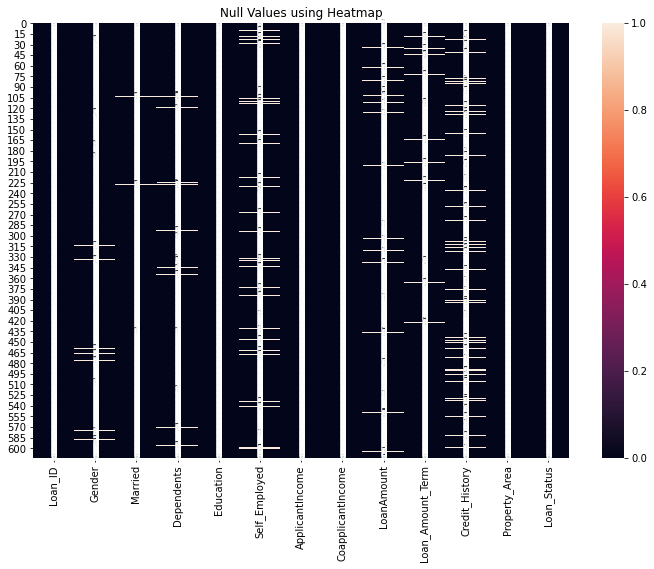

In [10]:
plt.figure(figsize=(12,8))
plt.title('Null Values using Heatmap')
sns.heatmap(df.isnull(),annot=True)
plt.show()

As we know from the above data This Dataset have Null Values.

#### Flling Null Values

In [11]:
#filling all the null values with the Mode Values For Categorical Column

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [12]:
#Filling null values with Median for Float Datatypes

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

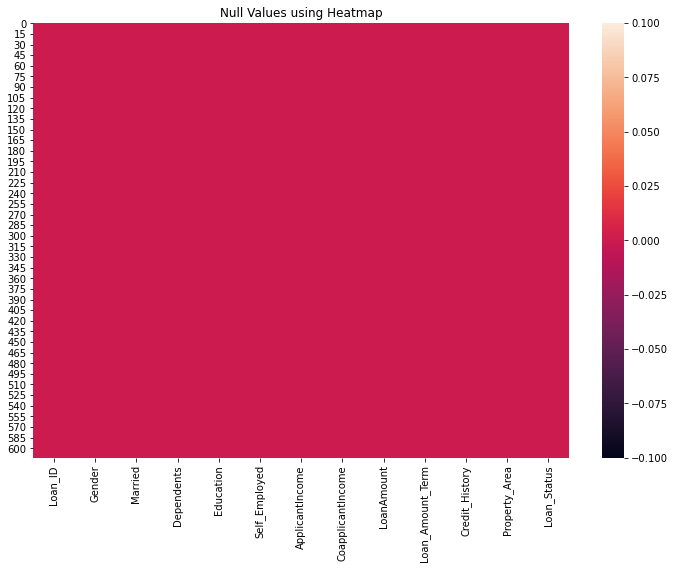

In [13]:
plt.figure(figsize=(12,8))
plt.title('Null Values using Heatmap')
sns.heatmap(df.isnull())
plt.show()

All The Null Values are Treated.

## Checking Correlation

<AxesSubplot:title={'center':'Correlation Heatmap'}>

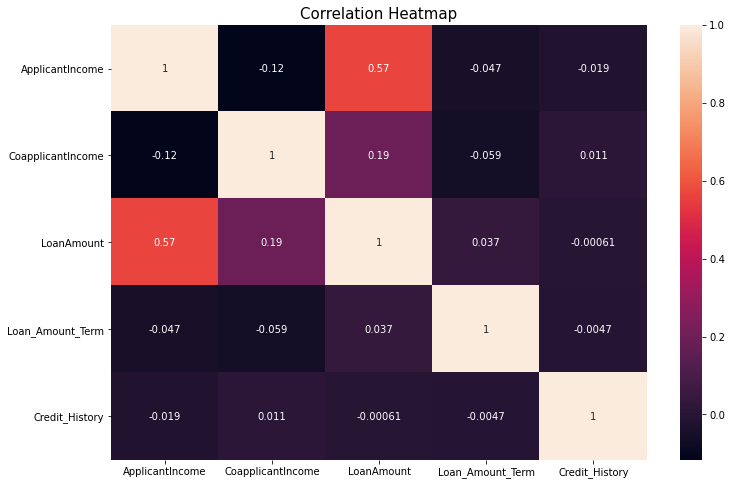

In [14]:
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True)

Neither the strong positive nor the strong negative correlation present in any variable.

In [15]:
#Droping Unnecessary Columns

df.drop(columns=['Loan_ID'],inplace=True)

#As this information doesn't require for Model Building

In [16]:
#Separating Numerical and Categorical Attributes

df_num=df.select_dtypes(exclude='object')

df_obj=df.select_dtypes(include='object')

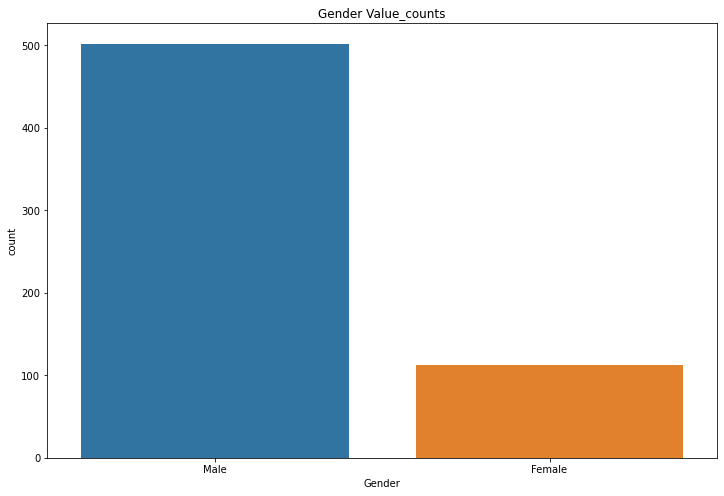

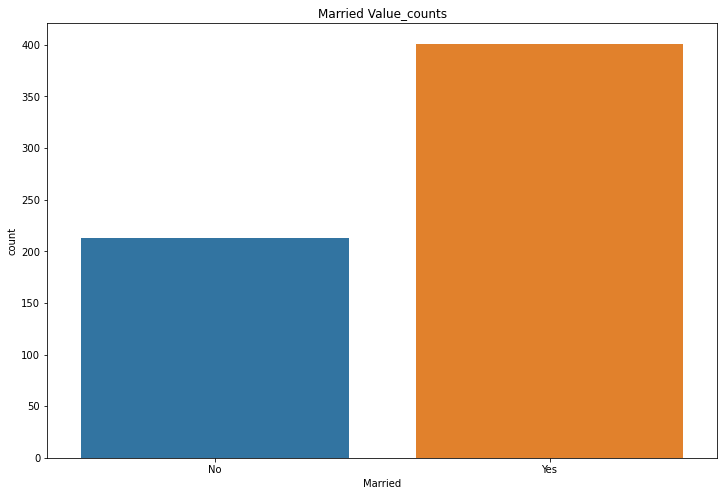

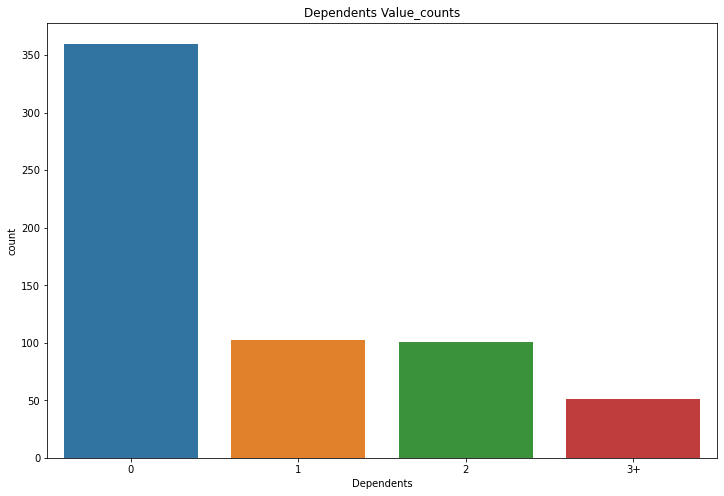

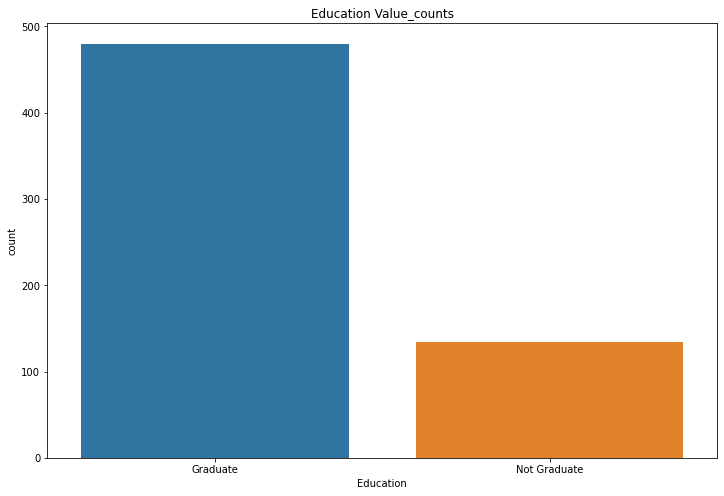

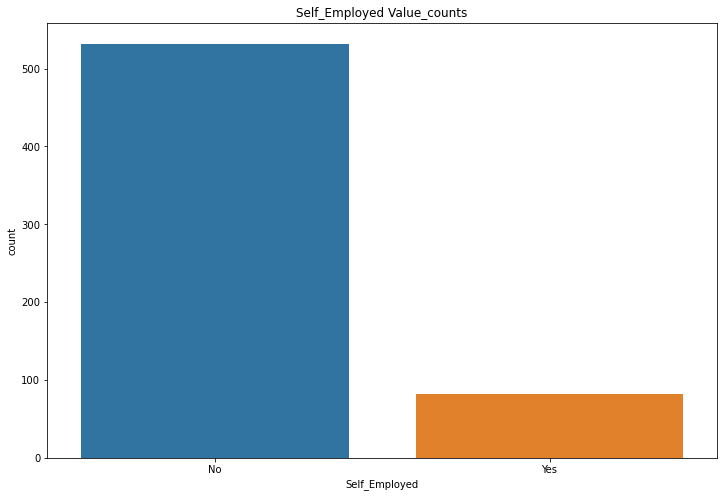

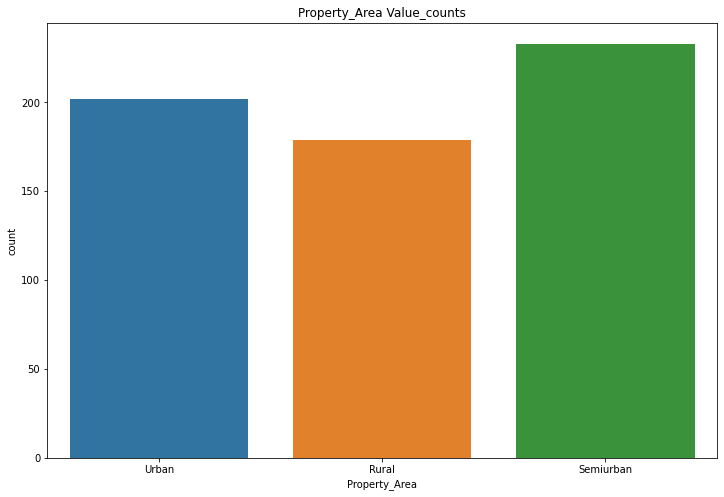

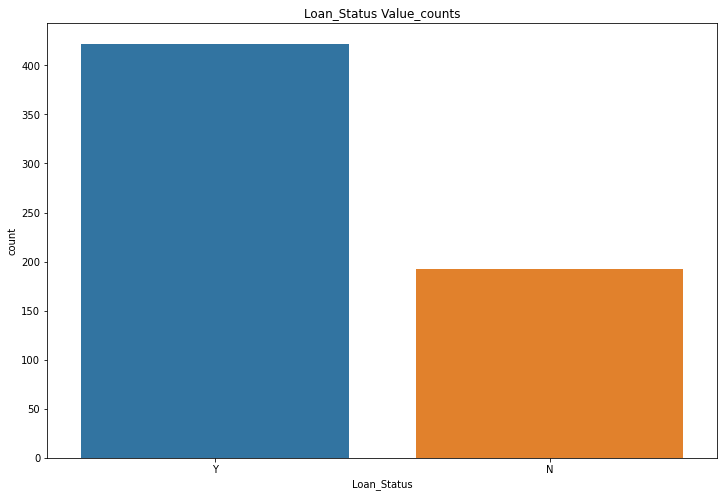

In [17]:
for col in df_obj:
    plt.figure(figsize=(12,8))
    plt.title(col+' Value_counts')
    x = sns.countplot(df[col],data=df)
    plt.show()

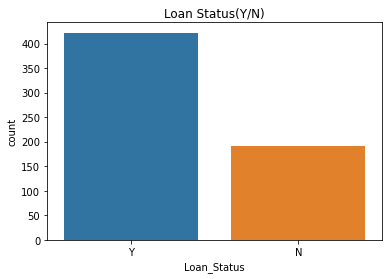

In [18]:
# Lets check the count of loan status
plt.title('Loan Status(Y/N)')
sns.countplot(x="Loan_Status",data=df)
plt.show()

We can see that Maximun applied loans are Accepted

In [19]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Out of All application 422 Application Approved and 192 Application Rejected

# Bivariate Analysis

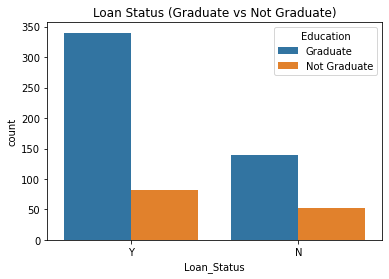

In [20]:
# Check the count based on "Education"
plt.title('Loan Status (Graduate vs Not Graduate)')
sns.countplot(x="Loan_Status",hue="Education",data=df)
plt.show()

Persons who are Graduated easily getting loans than who are not.So Education is the mainfactor.

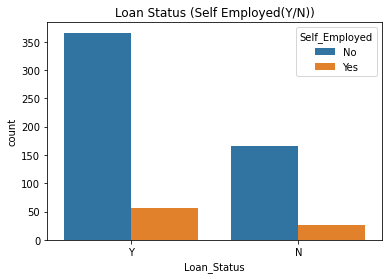

In [21]:
# Check the count of loan status according "Self_Employed"
plt.title('Loan Status (Self Employed(Y/N))')
sns.countplot(x="Loan_Status",hue="Self_Employed",data=df)
plt.show()

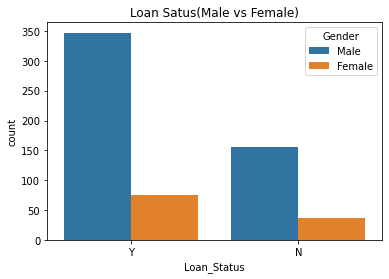

In [22]:
# Check loan status based on gender
plt.title('Loan Satus(Male vs Female)')
sns.countplot(x="Loan_Status",hue="Gender",data=df)
plt.show()

Here we can see that number of Males is high who applied for loan than Females.

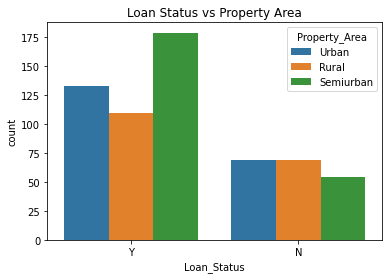

In [23]:
# Chcek the loan status based on property area
plt.title('Loan Status vs Property Area')
sns.countplot(x="Loan_Status",hue="Property_Area",data=df)
plt.show()

People who live in Semiurban and Urban have higher chance of getting Loan

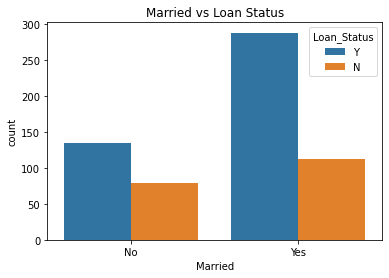

In [24]:
# Chcek the count based on marital status
plt.title('Married vs Loan Status')
sns.countplot(x="Married",hue="Loan_Status",data=df)
plt.show()

Persons who are Married have the high chance of getting Loan.

In [25]:
def Kdeplot(x):
    fig = plt.figure(figsize=(10,4))
    ax=sns.kdeplot(df.loc[(df['Loan_Status'] == 'N'),x] , color='r',shade=True, label='Loan Rejected') 
    ax=sns.kdeplot(df.loc[(df['Loan_Status'] == 'Y'),x] , color='g',shade=True, label='Loan Aprroved')
    plt.title('Loan Approval status with respect to {}'.format(x))

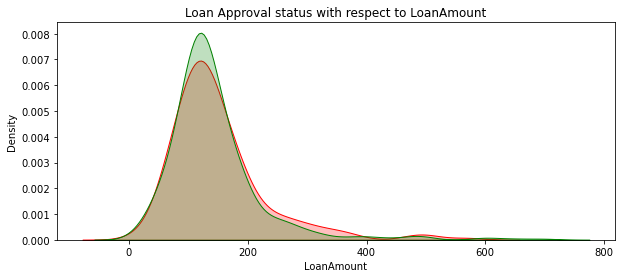

In [26]:
Kdeplot('LoanAmount')

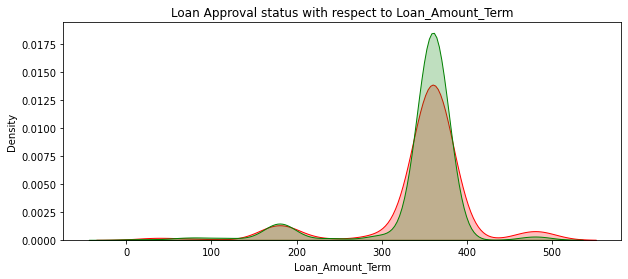

In [27]:
Kdeplot('Loan_Amount_Term')

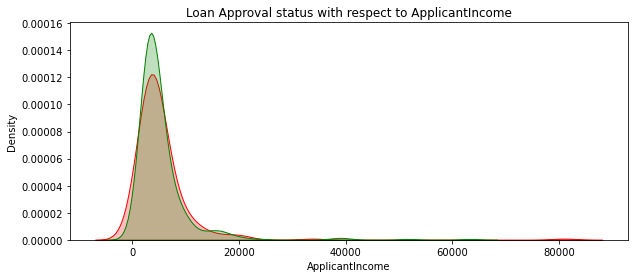

In [28]:
Kdeplot('ApplicantIncome')

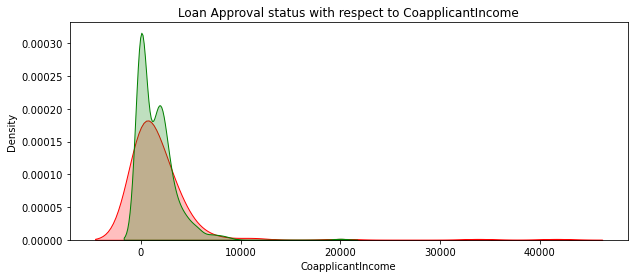

In [29]:
Kdeplot('CoapplicantIncome')

We can see that there is similar density for these parameters in terms of loan approved or rejected, it means these parameters have less influence on loan approval rate

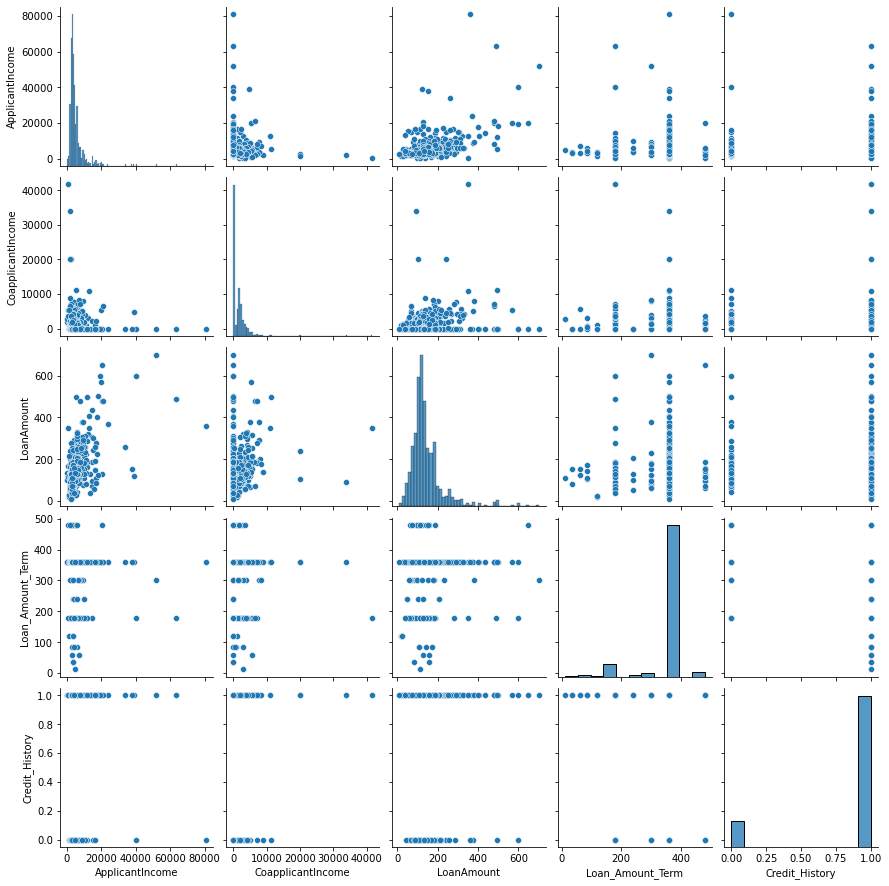

In [30]:
sns.pairplot(df)

# Outliers Detection

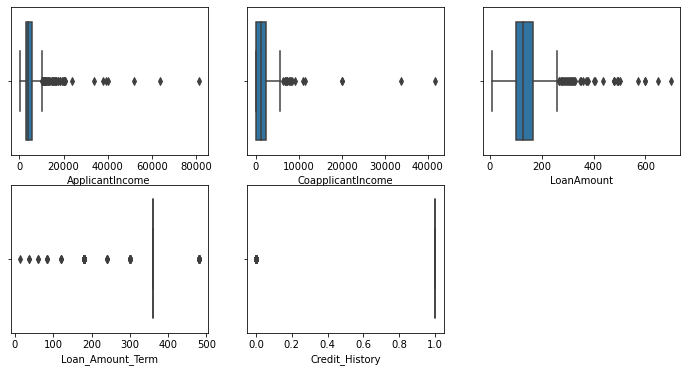

In [31]:
plt.figure(figsize=(12,6))
plot=1
for col in df_num:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()


Outliers Present in ApplicantIncome,coapplicantIncome,LoanAmount

In [32]:
#Treating Outliers
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

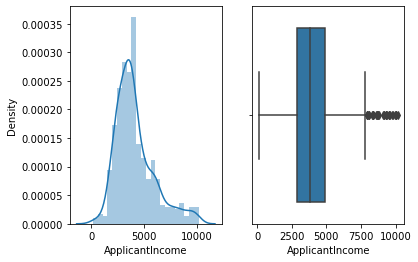

In [33]:
replace_outlier(df,'ApplicantIncome')

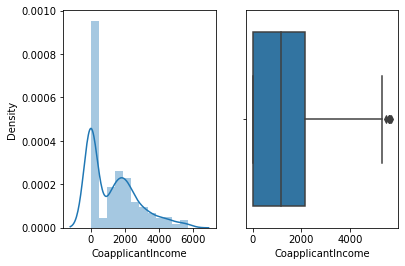

In [34]:
replace_outlier(df,'CoapplicantIncome')

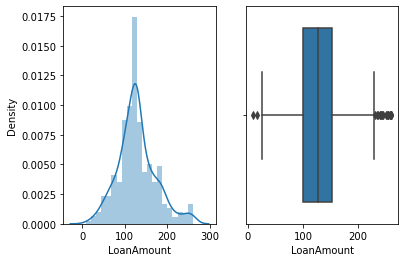

In [35]:
replace_outlier(df,'LoanAmount')

Outliers Removed

# Checking Skewness

In [36]:
df.skew()

ApplicantIncome      1.149106
CoapplicantIncome    0.936471
LoanAmount           0.498333
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [37]:
for i in df_num:
    if df[i].skew()>0.55:
        df[i]=np.sqrt(df[i])

In [38]:
df.skew()

ApplicantIncome      0.438048
CoapplicantIncome    0.152060
LoanAmount           0.498333
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

Removing Outliers At Possible Extent

# Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_obj:
    df[col]=le.fit_transform(df[col])

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,76.478755,0.000000,128.0,360.0,1.0,2,1
1,1,1,1,0,0,67.697858,38.832976,128.0,360.0,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,120.0,360.0,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,141.0,360.0,1.0,2,1


# Splitting Data into Input and Output

In [41]:
df_x=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

In [42]:
print(df_x.shape)
print('\n')
print(y.shape)

(614, 11)


(614,)


# Standard Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

# Feature Importance

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

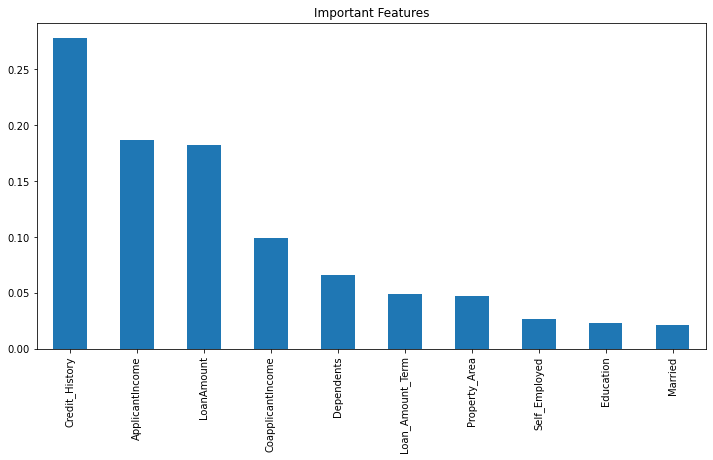

In [45]:
plt.figure(figsize=(12,6))
plt.title('Important Features')
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='bar')
plt.show()

# Model Building

In [46]:
#Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

# Lets Find the best Random state no for Maximum accuracy

In [47]:
maxAccu=0
maxRS=0


for i in range (1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LogisticRegression()
    
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print('Best accuracu is',maxAccu,'on Random State',maxRS)

Best accuracu is 0.8766233766233766 on Random State 63


# Divide the data into Train and Test

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=63,stratify=y)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(460, 11) (154, 11) (460,) (154,)


In [49]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
gnb=GaussianNB()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
adb=AdaBoostClassifier()

In [50]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('AdaBoostClassifier',adb))

LogisticRegression


LogisticRegression()


Accuracy_score= 0.8116883116883117


Cross_Val_Score= 0.8079323109465891


roc_auc_score= 0.7093160377358491


classification_report
               precision    recall  f1-score   support

           0       0.91      0.44      0.59        48
           1       0.79      0.98      0.88       106

    accuracy                           0.81       154
   macro avg       0.85      0.71      0.73       154
weighted avg       0.83      0.81      0.79       154



[[ 21  27]
 [  2 104]]





GaussianNB


GaussianNB()


Accuracy_score= 0.8116883116883117


Cross_Val_Score= 0.8079587519830775


roc_auc_score= 0.7093160377358491


classification_report
               precision    recall  f1-score   support

           0       0.91      0.44      0.59        48
           1       0.79      0.98      0.88       106

    accuracy                           0.81       154
   macro avg       0.85      0.71      0.73       154
weighted avg       0.83      0.

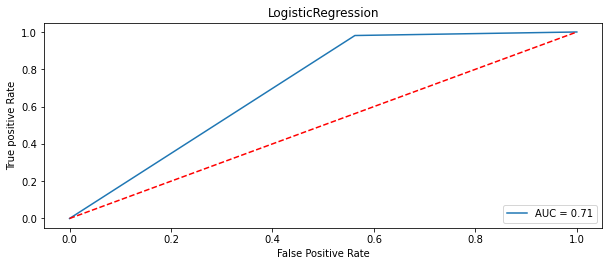

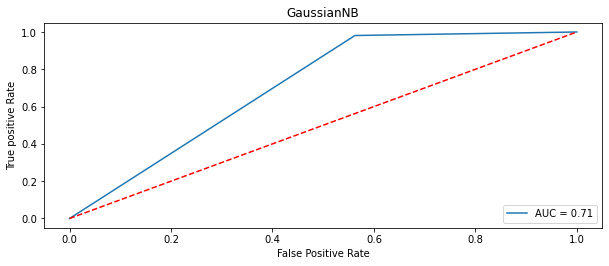

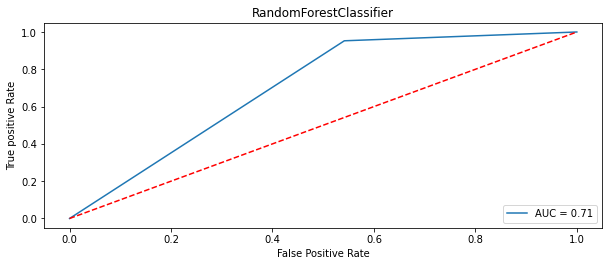

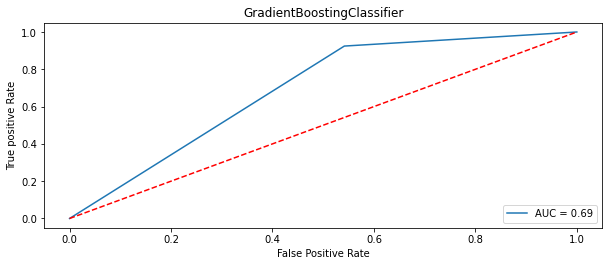

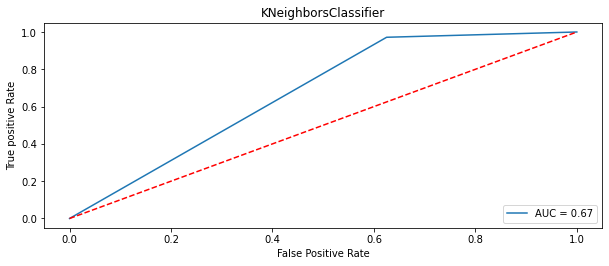

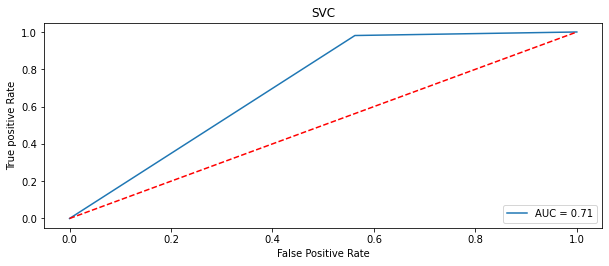

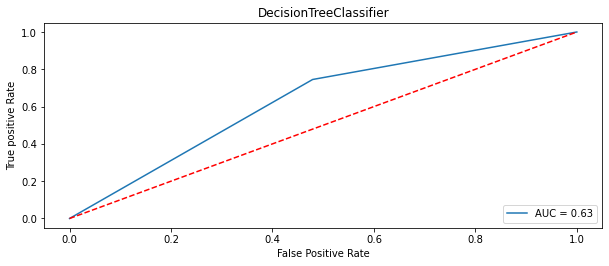

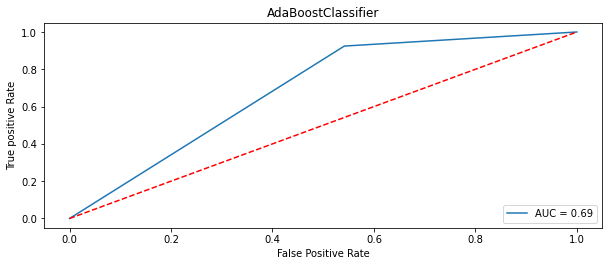

In [51]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print(name)
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [52]:
result = pd.DataFrame({'Model':Model,'Accuracy_score': score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,LogisticRegression,81.168831,80.793231,70.931604
1,GaussianNB,81.168831,80.795875,70.931604
2,RandomForestClassifier,79.870130,79.169751,70.558176
3,GradientBoostingClassifier,77.922078,78.683236,69.143082
4,KNeighborsClassifier,78.571429,77.689053,67.334906
5,SVC,81.168831,80.957166,70.931604
6,DecisionTreeClassifier,67.532468,70.703332,63.305818
7,AdaBoostClassifier,77.922078,79.000529,69.143082


Here our LogisticRegression model is most generalized model because the difference between accuracy score and Cross validation score is minimum. So we will select LogisticRegression as our best model

# Hyperparameter Tuning

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,test_size=.20,stratify=y)

param={'penalty':['l2','l1','elasticnet'],'C':[.001,.01,.1,1,10],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'max_iter':[50,100,200]}

grid=GridSearchCV(estimator=lr,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_

{'C': 0.001, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}

In [54]:
lr_final=LogisticRegression(C= 0.001,max_iter=50,penalty='l2',solver='liblinear')
lr_final.fit(x_train,y_train)
pred=lr_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 0.7967479674796748


Final f_1 score : 0.8691099476439791


Final roc_auc score : 0.8326859045504995


Final classification Report :               precision    recall  f1-score   support

           0       0.39      0.88      0.55        17
           1       0.98      0.78      0.87       106

    accuracy                           0.80       123
   macro avg       0.69      0.83      0.71       123
weighted avg       0.90      0.80      0.82       123



Final confusion Matrix : [[15  2]
 [23 83]]


# Saving The Model

In [55]:
import joblib
joblib.dump(lr_final,'Loan_Application_Status.pkl')

['Loan_Application_Status.pkl']